In [1]:
import Pkg

In [2]:
# Pkg.add("StatsBase")

In [3]:
packages = String.(split("Plots DataFrames Flux XLSX CSV Distributions SymbolicRegression SymbolicUtils StatsBase StatsPlots"," "))

# for pkg in packages
#     Pkg.add(pkg)
# end

10-element Vector{String}:
 "Plots"
 "DataFrames"
 "Flux"
 "XLSX"
 "CSV"
 "Distributions"
 "SymbolicRegression"
 "SymbolicUtils"
 "StatsBase"
 "StatsPlots"

In [1]:
# import XLSX as xls
import DataFrames as dtfr
import Plots as plt
plt.gr(display_type=:inline)

import CSV
import Flux as flx

import SymbolicRegression as symreg
import SymbolicUtils as symutil

import StatsBase as stbs
# import Distributions as dist

## Load data

In [2]:
data_dir = "/mnt/beegfs/projects/power-conv/data"
input_name = "cycle"; output_name = "vce"
specs = "Tref35C_DeltaT_110C"

println(readdir(data_dir))


[".ipynb_checkpoints", "Cross-Section Analysis.xlsx - average.csv", "Données Nausicaa Dornic.zip", "csv", "csv.tar.gz", "maunaloa-co2.csv", "points.txt", "xls", "xls.tar.gz"]


## crack length

In [4]:
crack_df = dtfr.DataFrame(CSV.File(joinpath(data_dir, "points.txt"), header=["cycle", "cracklength"]))

,cycle,cracklength
,Int64,Float64
1,0,-7.16761
2,100,-6.61182
3,200,-6.0545
4,300,-5.49473
5,400,-4.93166
6,500,-4.36441
7,600,-3.79215
8,700,-3.21407
9,800,-2.62937


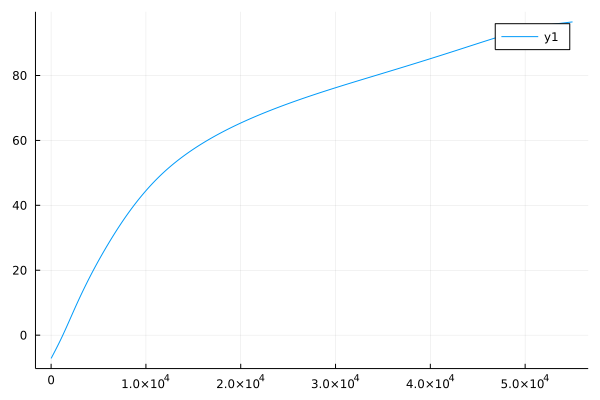

In [5]:
plt.plot(crack_df[:, :cycle], crack_df[:, :cracklength])

In [6]:
crack_voltage_df = dtfr.DataFrame(CSV.File(joinpath(data_dir, "Cross-Section Analysis.xlsx - average.csv")))

,cracklength%,cycle,Vce%
,Float64,Int64,Float64
1,0.0,0,0.0
2,28.8468,6000,0.29
3,51.342,14000,0.62
4,75.3953,30000,1.135
5,86.9158,40000,1.73
6,94.1391,48000,2.915
7,96.3207,57500,4.13


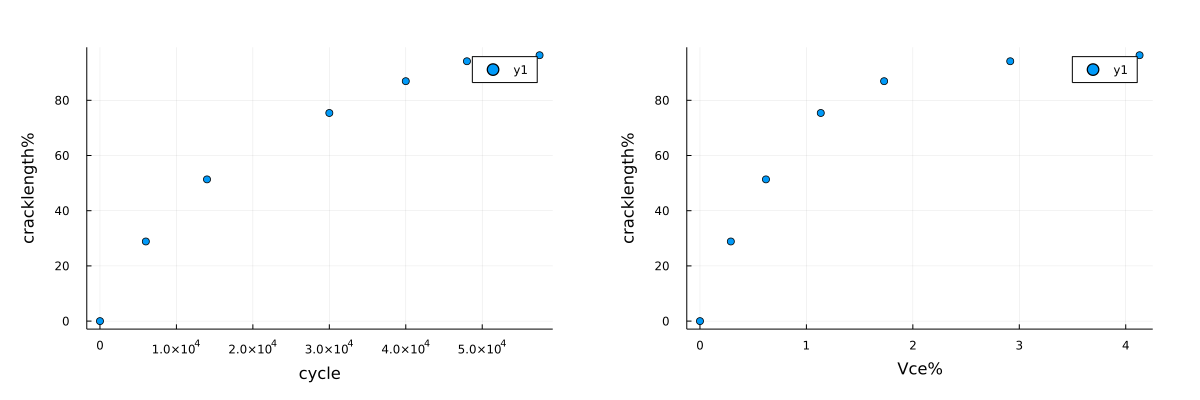

In [7]:
fig1 = plt.scatter(crack_voltage_df[:, "cycle"], crack_voltage_df[:, "cracklength%"], xlabel="cycle", ylabel="cracklength%")
fig2 = plt.scatter(crack_voltage_df[:, "Vce%"], crack_voltage_df[:, "cracklength%"], xlabel="Vce%", ylabel="cracklength%")
plt.plot(fig1, fig2, layout=(1,2), size=(1200, 400), margin=10plt.mm)

w=2; 𝑏 = 2 𝑚𝑚, radius initial value 𝑎0 =
332 𝜇𝑚, 𝑡 = 4𝜇𝑚, and p = 3.8 ∗ 10−8Ωm.
\begin{align}
    R(a) = \frac \rho 2 \left(\frac 1 {2a} + \frac w {\pi t} \left( \frac {b^2} {b^2 - a^2} ln\ (\frac b a) - \frac 1 2 \right) \right)\\
    \frac {\Delta Vce} {Vce_0} = \frac {\Delta R(A)_{15W} * I} {Vce_0}\\
    \Delta R(A)_{15W} = R(a_m)_{15W} - R(a_0)_{15W} = \frac {R(a_m) * R(a_0)} {4R(a_m) + 11R(a_0)} - \frac {R(a_0)} {15}
\end{align}

110'C, delta 55'C, 3 seconds: Vce0 = 1.47, I=150

t=10*10^-6 \
p = 2.7 * 10^-8 \
w = 2 \
a0 = 380 * 10^-6
b = 6 * a0 ?

In [11]:
wparam = 2
bparam=2000
tparam=10 * 1e-6
pparam = 2.7 * 1e-8
Iparam = 150
Vce0 = 1.47

# a0param = 698
a0param = 380 *1e-6
bparam = 6 * a0param

function contact_to_resistance(a, p, w, t, b)
    return p/2 * (w / π / t * (b^2) / (b^2 - a^2) * log(b/a) - 1/2)
end

function resistance_variation(Ram, Ra0)
    return Ram * Ra0 / (4Ram + 11Ra0) - Ra0 / 15
end

function resistance_to_voltage(resistance, current, voltage0)
    return resistance * current / voltage0
end

resistance_to_voltage (generic function with 1 method)

In [12]:
crack_voltage_df[:, :contact] = a0param .* (1 .- crack_voltage_df[:, "cracklength%"]/100)
crack_voltage_df[:, "Ram"] = contact_to_resistance.(crack_voltage_df[:, "contact"], pparam, wparam, tparam, bparam)

7-element Vector{Float64}:
 0.0015838943346931074
 0.0018585306111143373
 0.002173289359042711
 0.0027496497051680197
 0.0032893565652436082
 0.003978379138233875
 0.0043783026536804446

In [13]:
Ra0 = contact_to_resistance(a0param, pparam, wparam, tparam, bparam)

0.0015838943346931074

## Cycle voltage

In [7]:
readdir(joinpath(data_dir, "csv", specs))

12-element Vector{String}:
 "Tref35C_DeltaT_110C-Rth Module 1H.csv"
 "Tref35C_DeltaT_110C-Rth Module 1L.csv"
 "Tref35C_DeltaT_110C-Rth Module 4H.csv"
 "Tref35C_DeltaT_110C-Rth Module 4L.csv"
 "Tref35C_DeltaT_110C-Rth Module 5H.csv"
 "Tref35C_DeltaT_110C-Rth Module 5L.csv"
 "Tref35C_DeltaT_110C-Rth Module 6H.csv"
 "Tref35C_DeltaT_110C-Rth Module 6L.csv"
 "Tref35C_DeltaT_110C-Rth Module 7H.csv"
 "Tref35C_DeltaT_110C-Rth Module 7L.csv"
 "Tref35C_DeltaT_110C-Rth Module 8H.csv"
 "Tref35C_DeltaT_110C-Rth Module 8L.csv"

In [6]:
function read_csv(datadir, specs)    
    csvpath = joinpath(datadir, specs)
    
#     datadict = Dict{String, dtfr.DataFrame}(
#         filename => dtfr.DataFrame(csv.File(joinpath(csvpath, filename))) 
#         for filename in filter(file -> endswith(file, ".csv"), readdir(csvpath)) )
    
    datadict = Dict{String, dtfr.DataFrame}()
    for filename in filter(file -> endswith(file, ".csv"), readdir(csvpath))    
        dataframe = dtfr.DataFrame(CSV.File(joinpath(csvpath, filename)))
#         extract from - to .csv
        modulename = filename[findfirst("-", filename)[1] + 1 : findfirst(".csv", filename)[1] - 1]
        datadict[modulename] = dataframe
    end        
    
    return datadict
end

specs_data = read_csv(data_dir, specs)
specs_data

Dict{String, DataFrames.DataFrame} with 12 entries:
  "Rth Module 4L" => 19×2 DataFrame…
  "Rth Module 6L" => 19×2 DataFrame…
  "Rth Module 8H" => 15×2 DataFrame…
  "Rth Module 7L" => 7×2 DataFrame…
  "Rth Module 4H" => 19×2 DataFrame…
  "Rth Module 8L" => 15×2 DataFrame…
  "Rth Module 5H" => 23×2 DataFrame…
  "Rth Module 1L" => 11×2 DataFrame…
  "Rth Module 5L" => 23×2 DataFrame…
  "Rth Module 6H" => 19×2 DataFrame…
  "Rth Module 7H" => 7×2 DataFrame…
  "Rth Module 1H" => 11×2 DataFrame…

## Plot

In [48]:
# specs_data["Rth Module 15L"]

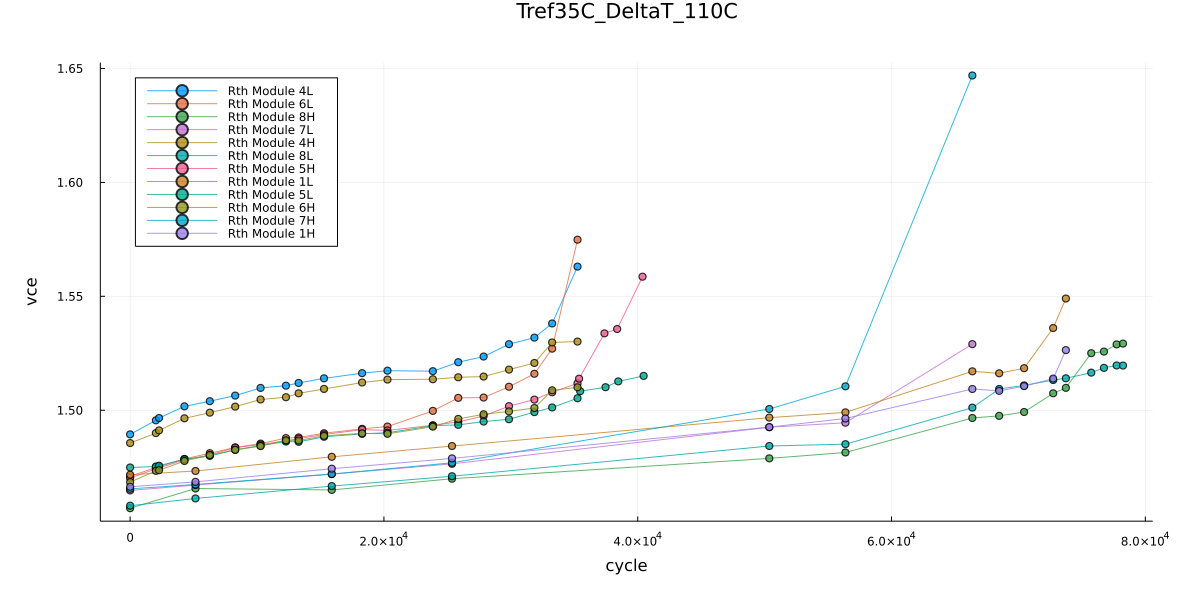

In [7]:
function plot_single(specsdata, specs)
    fig = plt.plot(title=specs, size=(1200, 600), xlabel=input_name, ylabel=output_name, margin = 10plt.mm)
    for (modulename, moduledata) in specsdata
    #     println(modulename)
        plt.plot!(fig, moduledata[!, input_name], moduledata[!, output_name], label=modulename,
        legend=:topleft, markershape=:circle, alpha=0.8)
    end
    return fig
end
    
plot_single(specs_data, specs)

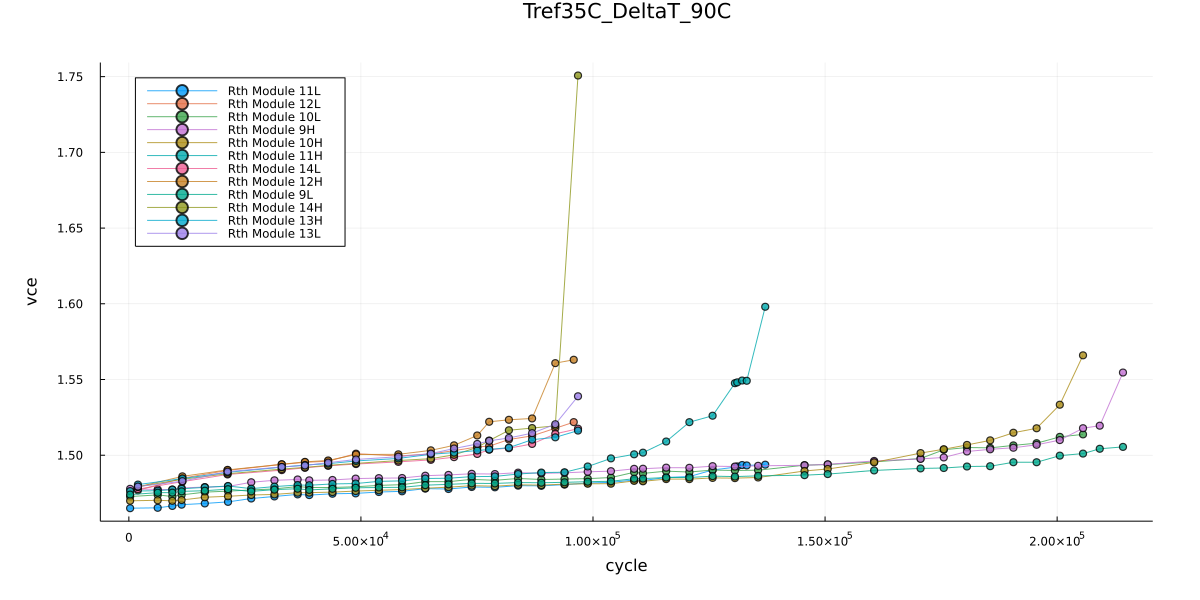

In [8]:
specs = "Tref35C_DeltaT_90C"
specs_data = read_csv(data_dir, specs)
plot_single(specs_data, specs)

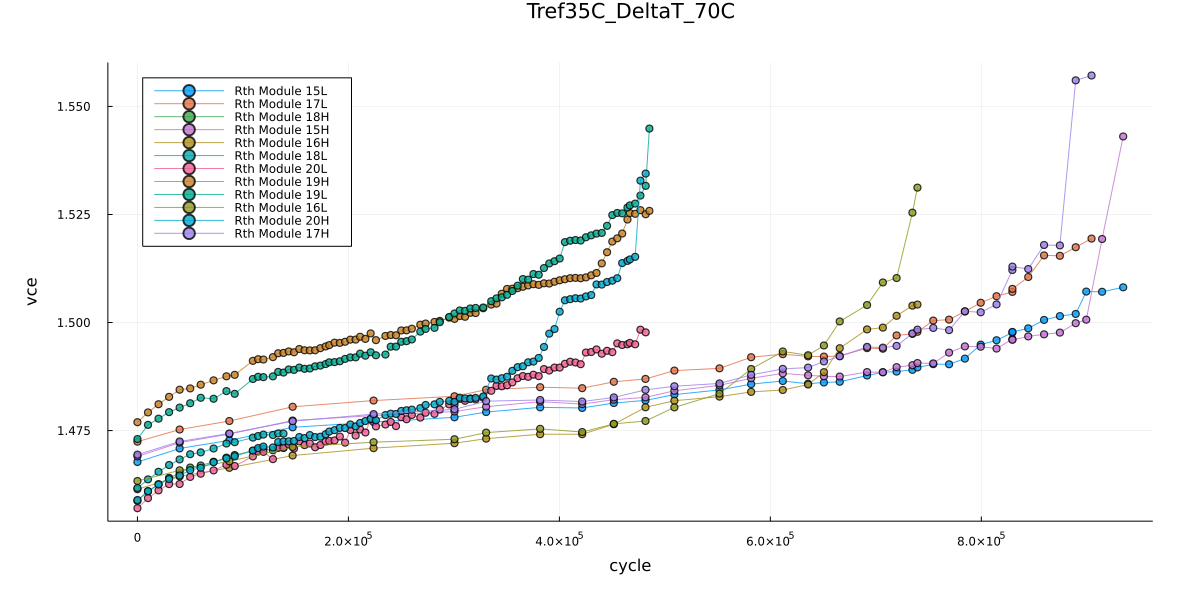

In [9]:
specs = "Tref35C_DeltaT_70C"
specs_data = read_csv(data_dir, specs)
plot_single(specs_data, specs)

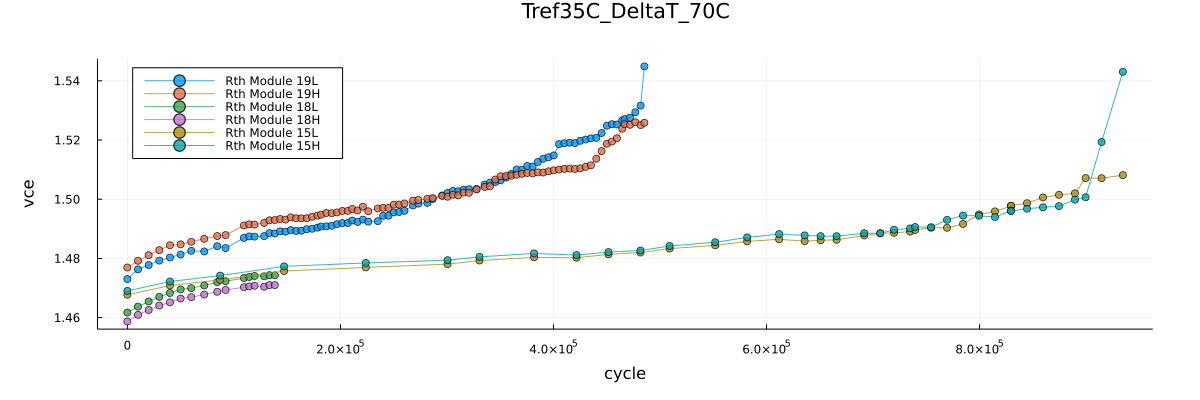

In [95]:
selected_modules = split("Rth Module 19L ; Rth Module 19H ; Rth Module 18L ; Rth Module 18H ; Rth Module 15L ; Rth Module 15H", " ; ")

fig = plt.plot(title=specs, size=(1200, 400), xlabel=input_name, ylabel=output_name, margin = 10plt.mm)
# plt.scatter(specs_data["Rth Module 19H"][!, input_name], specs_data["Rth Module 19H"][!, output_name], legend=:topleft)
# plt.scatter!(specs_data["Rth Module 15H"][!, input_name], specs_data["Rth Module 15H"][!, output_name], legend=:topleft)
for modulename in selected_modules
    plt.plot!(fig, specs_data[modulename][!, input_name], specs_data[modulename][!, output_name],
    label=modulename, legend=:topleft, markershape=:circle, alpha=0.8)
end
fig

## Preprocess

In [24]:
selected_module = "Rth Module 19L"
all_input = Float32.(specs_data[selected_module][!, input_name])
all_target = Float32.(specs_data[selected_module][!, output_name])

83-element Vector{Float32}:
 1.473042
 1.4763149
 1.4777595
 1.4792669
 1.48032
 1.4813299
 1.4825879
 1.4823608
 1.4841374
 1.4835029
 1.4869374
 1.4874424
 1.4873608
 ⋮
 1.5205694
 1.52073
 1.5223695
 1.524856
 1.5253509
 1.5252559
 1.5266005
 1.5270954
 1.527519
 1.529372
 1.531619
 1.5448769

In [25]:
input_preprocessor = stbs.fit(stbs.UnitRangeTransform, all_input)
preprocessed_input = stbs.transform(input_preprocessor, all_input)

target_preprocessor = stbs.fit(stbs.UnitRangeTransform, all_target)
preprocessed_target = stbs.transform(target_preprocessor, all_target)

83-element Vector{Float32}:
 0.0
 0.04556128
 0.065670975
 0.086655214
 0.10131515
 0.11537434
 0.13288693
 0.1297256
 0.15445697
 0.1456235
 0.19343506
 0.20046465
 0.19932957
 ⋮
 0.66162014
 0.6638555
 0.68667847
 0.7212921
 0.72818226
 0.7268597
 0.74557704
 0.7524673
 0.7583634
 0.7841585
 0.8154382
 1.0

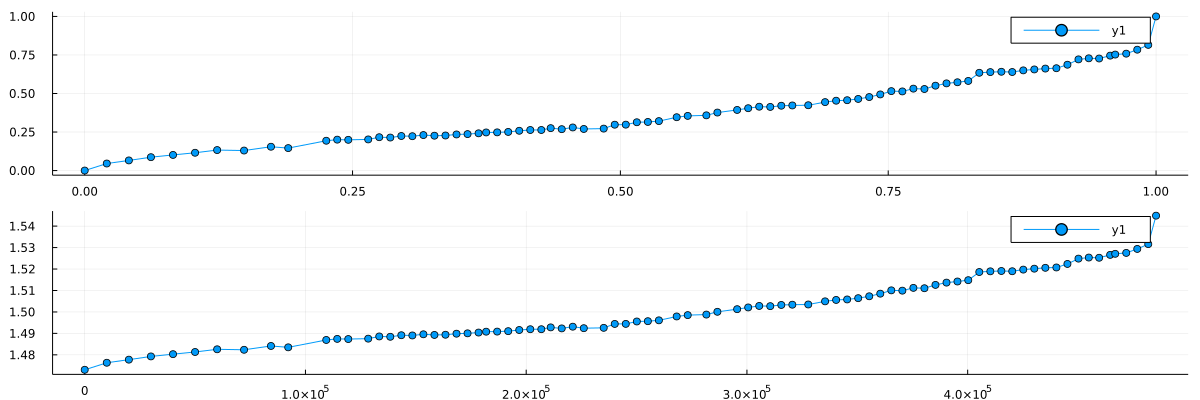

In [72]:
plot1 = plt.plot(preprocessed_input, preprocessed_target, markershape=:circle, size=(1200,400))
plot2 = plt.plot(stbs.reconstruct(input_preprocessor, preprocessed_input), 
    stbs.reconstruct(target_preprocessor, preprocessed_target),
    markershape=:circle, size=(1200,400))
plt.plot(plot1, plot2, layout=(2,1))

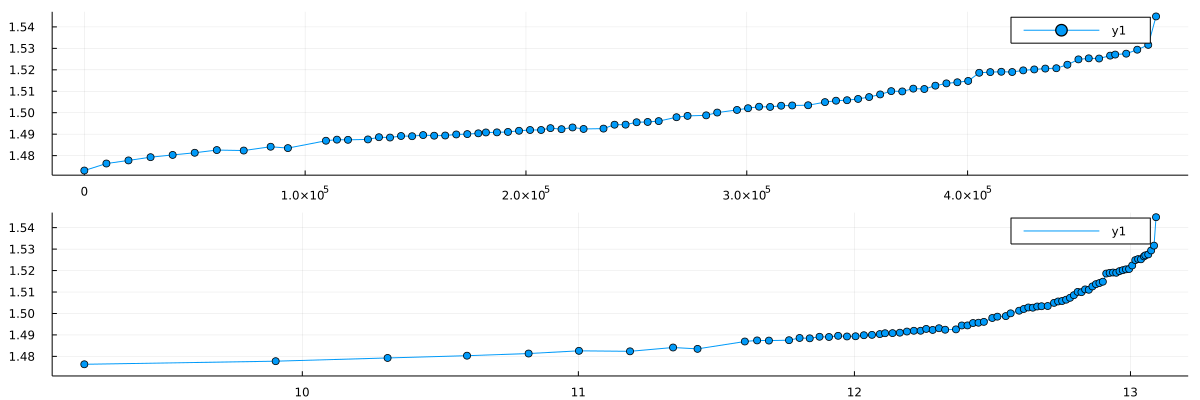

In [73]:
plot3 = plt.plot(stbs.reconstruct(input_preprocessor, preprocessed_input) .|> log, 
    stbs.reconstruct(target_preprocessor, preprocessed_target),
    markershape=:circle, size=(1200,400))
plt.plot(plot2, plot3, layout=(2,1))

## Symbolic Regression

In [39]:
options = symreg.Options(
    binary_operators=(+, *, /, -),
#     unary_operators=(cos, exp),
    npopulations=20
)

# hallOfFame = symreg.EquationSearch(reshape(all_input, 1, :), all_target, niterations=5, options=options, numprocs=1)
hallOfFame = symreg.EquationSearch(reshape(preprocessed_input, 1, :), preprocessed_target, niterations=5, options=options, numprocs=1)
dominating = symreg.calculateParetoFrontier(reshape(preprocessed_input, 1, :), preprocessed_target, hallOfFame, options)
eqn = symreg.node_to_symbolic(dominating[end].tree, options)


Activating environment on workers.
      From worker 3:	  Activating project at `~/.julia/environments/v1.7`
Importing installed module on workers...Finished!
Testing module on workers...Finished!
Testing entire pipeline on workers...Finished!
Started!
0.0%┣                                          ┫ 0/100 [00:00<00:-5, -20.0 it/s]Head worker occupation: 0.0%                                                    Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   -----------------------------------------                                       Complexity  Loss       Score     Equation                                       1           3.389e-02  3.004e-01  x1                                            3           2.944e-03  1.222e+00  (0.7420807 * x1)                              5           2.699e-03  4.336e-02  ((0.88848203 / 1.2451128) * x1)               11          2.567e-03  8.38

(((((x1 * x1) + x1) * 1.2978455) + 1.0516396) + (x1 * -2.7929218)) * x1

In [40]:
println(eqn)
println(symutil.simplify(eqn))

(((((x1 * x1) + x1) * 1.2978455) + 1.0516396) + (x1 * -2.7929218)) * x1
(1.0516396 + (-2.7929218 * x1) + (1.2978455 * (x1 + (x1 ^ 2)))) * x1


In [41]:
options = symreg.Options(
    binary_operators=(+, *, /, -),
    unary_operators=(log, exp),
    npopulations=20
)

hallOfFame = symreg.EquationSearch(reshape(preprocessed_input, 1, :), preprocessed_target, niterations=5, options=options, numprocs=1)
dominating = symreg.calculateParetoFrontier(reshape(preprocessed_input, 1, :), preprocessed_target, hallOfFame, options)
eqn = symreg.node_to_symbolic(dominating[end].tree, options)


Activating environment on workers.
      From worker 4:	  Activating project at `~/.julia/environments/v1.7`
Importing installed module on workers...Finished!
Testing module on workers...Finished!
Testing entire pipeline on workers...Finished!
Started!
0.0%┣                                          ┫ 0/100 [00:00<00:-5, -20.0 it/s]Head worker occupation: 0.0%                                                    Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   -----------------------------------------                                       Complexity  Loss       Score     Equation                                       1           8.414e-02  -6.089e-01  0.20006298                                   3           8.945e-03  1.121e+00  (x1 - 0.20006298)                             5           5.384e-03  2.539e-01  (x1 - (0.20006298 * x1))                      10          4.242e-03  4.76

x1 - (((x1 + 0.17586923) - (x1 * x1)) * (x1 + -0.06924428))

In [42]:
println(eqn)
println(symutil.simplify(eqn))

x1 - (((x1 + 0.17586923) - (x1 * x1)) * (x1 + -0.06924428))
(-1 * (-0.06924428 + x1) * (0.17586923 + x1 + (-1 * (x1 ^ 2)))) + x1


In [43]:
poly1(x1) = (1.0516396 + (-2.7929218 * x1) + (1.2978455 * (x1 + (x1 ^ 2)))) * x1
poly2(x1) = (-1 * (-0.06924428 + x1) * (0.17586923 + x1 + (-1 * (x1 ^ 2)))) + x1

poly2 (generic function with 1 method)

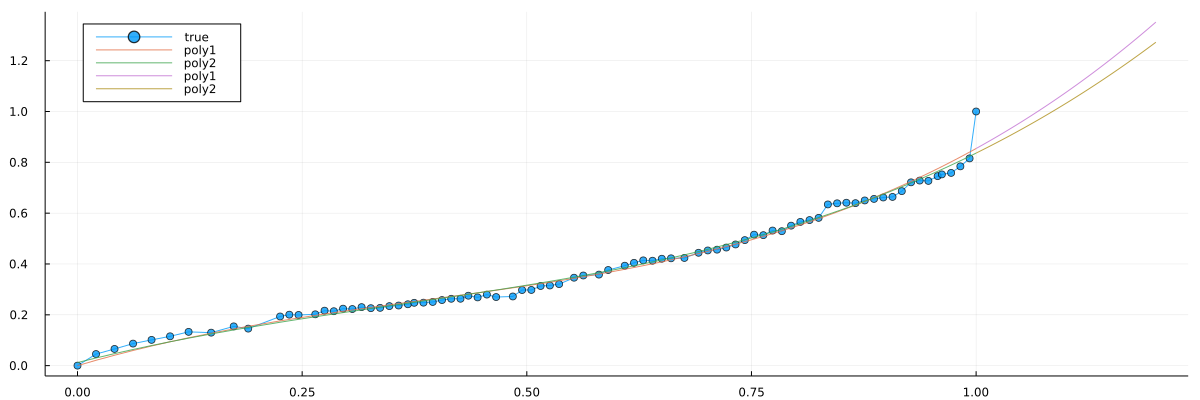

In [105]:
xsamples = range(1, 1.2, 1000)
plt.plot(size=(1200,400), legend=:topleft)
plt.plot!(preprocessed_input, preprocessed_target, markershape=:circle, size=(1200,400), label="true", legend=:topleft, alpha=0.8)
plt.plot!(preprocessed_input, poly1.(preprocessed_input), label="poly1", alpha=0.8)
plt.plot!(preprocessed_input, poly2.(preprocessed_input), label="poly2", alpha=0.8)
plt.plot!(xsamples, poly1.(xsamples), label="poly1", alpha=0.8)
plt.plot!(xsamples, poly2.(xsamples), label="poly2", alpha=0.8)


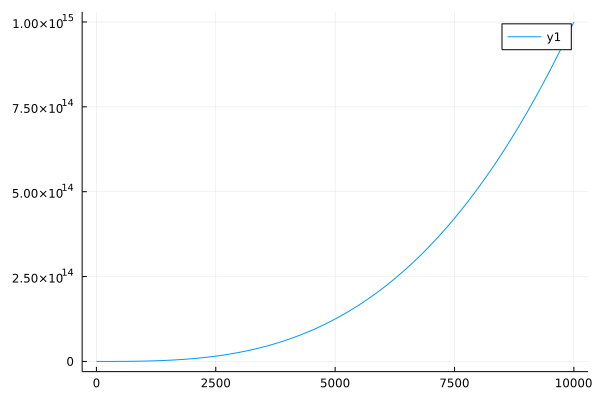

In [84]:
plt.plot(poly2.(range(1, 1e5, 10000)))

In [48]:
options = symreg.Options(
    binary_operators=(+, *, /, -),
#     unary_operators=(cos, exp),
    npopulations=20
)

hallOfFame = symreg.EquationSearch(reshape(all_input, 1, :), all_target, niterations=5, options=options, numprocs=1)
# hallOfFame = symreg.EquationSearch(reshape(preprocessed_input, 1, :), preprocessed_target, niterations=5, options=options, numprocs=1)
dominating = symreg.calculateParetoFrontier(reshape(preprocessed_input, 1, :), preprocessed_target, hallOfFame, options)
eqn = symreg.node_to_symbolic(dominating[end].tree, options)

Activating environment on workers.
      From worker 5:	  Activating project at `~/.julia/environments/v1.7`
Importing installed module on workers...Finished!
Testing module on workers...Finished!
Testing entire pipeline on workers...Finished!
Started!
0.0%┣                                          ┫ 0/100 [00:00<00:-5, -20.0 it/s]Head worker occupation: 0.0%                                                    Press 'q' and then <enter> to stop execution early.                             Hall of Fame:                                                                   -----------------------------------------                                       Complexity  Loss       Score     Equation                                       1           9.162e+10  -3.359e+01  x1                                           3           9.162e+10  4.709e-06  (x1 + -1.5856514)                             5           2.752e-01  1.150e+01  (x1 / (x1 + -0.06673465))                     7           1.384e-02  1.49

(((((-1.1087846e-7 * (x1 * (x1 * 0.32594162))) - x1) + 2.4495242) * -1.1087846e-7) + -0.27103603) - -1.7424756

In [49]:
println(eqn)
println(symutil.simplify(eqn))

(((((-1.1087846e-7 * (x1 * (x1 * 0.32594162))) - x1) + 2.4495242) * -1.1087846e-7) + -0.27103603) - -1.7424756
1.4714396 + (-1.1087846e-7 * (2.4495242 + (-1 * x1) + (-3.6139905e-8 * (x1 ^ 2))))


In [50]:
poly3(x1) = 1.4714396 + (-1.1087846e-7 * (2.4495242 + (-1 * x1) + (-3.6139905e-8 * (x1 ^ 2))))

poly3 (generic function with 1 method)

In [78]:
all_input

83-element Vector{Float32}:
      0.0
  10000.0
  20000.0
  30000.0
  40000.0
  50000.0
  60000.0
  72190.0
  84380.0
  92198.0
 109428.0
 114403.0
 119401.0
      ⋮
 435191.0
 440191.0
 445191.0
 450191.0
 454872.0
 459553.0
 464553.0
 466832.0
 471832.0
 476832.0
 481810.0
 485338.0

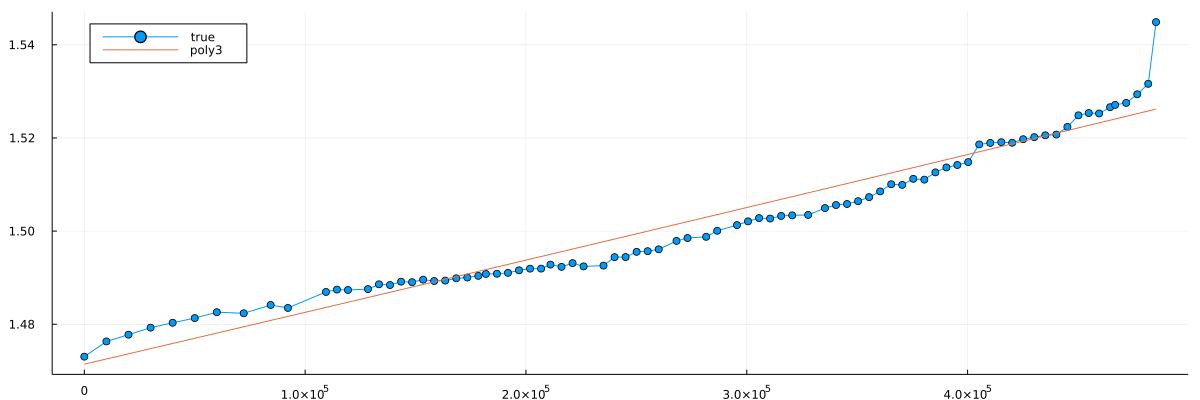

In [51]:
plt.plot(all_input, all_target, markershape=:circle, size=(1200,400), label="true", legend=:topleft)
plt.plot!(all_input, poly3.(all_input), label="poly3")

## RNN

In [67]:
function preprocess_data(specsdata, trainmodule, testmodule)
#     how to handle irregular time interval ?
    trainsequence = specsdata[trainmodule]
    testsequence = specsdata[testmodule]
    
    build_data(sequence) = sequence[!, output_name][1:end-1], sequence[!, output_name][2:end]
    
    traininput, trainlabel = build_data(trainsequence)
    testinput, testlabel = build_data(testsequence)
    
    return traininput, trainlabel, testinput, testlabel
    
end

train_input, train_label, test_input, test_label = preprocess_data(specs_data, "Rth Module 15H", "Rth Module 17H")
@show size(train_input) size(train_label) size(test_input) size(test_label)

size(train_input) = (36,)
size(train_label) = (36,)
size(test_input) = (34,)
size(test_label) = (34,)


(34,)

In [122]:
# rnn = flx.Chain(flx.GRU(1,2), flx.Dense(2,1))
# rnn(rand())
m = flx.Chain(flx.GRU(1, 5), flx.Dense(5, 1))
x = [rand(Float32, 1) for i in 1:3]
for xi in x
    @show xi
    m(xi)
end

xi = Float32[0.9744731]
xi = Float32[0.16104752]
xi = Float32[0.713249]


In [127]:
gru_model = flx.Chain(
    flx.GRU(1, 2),
    flx.Dense(2, 1))
# gru_params = flx.params(gru_model)
optimizer = flx.ADAM()
# loss_func(indata, outdata) = flx.Losses.mse(indata, outdata)

loss_func (generic function with 1 method)

In [128]:
loss_func(x, y) = sum(mse(m(xi), yi) for (xi, yi) in zip(x, y))


LoadError: invalid redefinition of constant loss_func

In [ ]:
loss_func(train_input, train_label)

In [131]:
function train_model(model, traininput, trainlabel, optim; epochs=5)
    modelparams = flx.params(model)
    loss = sum(flx.Losses.mse(model(xi), yi) for (xi, yi) in zip(traininput, trainlabel))
    for epoch in 1:epochs
        flx.train!(loss, modelparams, [(traininput, trainlabel)], optim)
        
        if (epochs < 10) | (epoch % floor(epochs/10) == 0)
#             epochloss = sum(loss(traininput, trainlabel))
#             println("Epoch $epoch loss=$epochloss")
        end
    end
end

train_model(gru_model, train_input, train_label, optimizer, epochs=10)

LoadError: MethodError: no method matching (::Flux.GRUCell{Matrix{Float32}, Vector{Float32}, Matrix{Float32}})(::Matrix{Float32}, ::Float64)
[0mClosest candidates are:
[0m  (::Flux.GRUCell{A, V, <:AbstractMatrix{T}})(::Any, [91m::Union{AbstractVector{T}, AbstractMatrix{T}, Flux.OneHotArray}[39m) where {A, V, T} at ~/.julia/packages/Flux/qAdFM/src/layers/recurrent.jl:308

In [111]:
function predict_model(model, indata)
    outdata = [model(xdata) for xdata in indata]
    flx.reset!(model)
    
    return outdata
end

train_prediction = predict_model(gru_model, train_input)

LoadError: MethodError: no method matching (::Flux.GRUCell{Matrix{Float32}, Vector{Float32}, Matrix{Float32}})(::Matrix{Float32}, ::Float64)
[0mClosest candidates are:
[0m  (::Flux.GRUCell{A, V, <:AbstractMatrix{T}})(::Any, [91m::Union{AbstractVector{T}, AbstractMatrix{T}, Flux.OneHotArray}[39m) where {A, V, T} at ~/.julia/packages/Flux/qAdFM/src/layers/recurrent.jl:308